In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Read data
header = pd.read_csv('output_data1.csv', nrows=0).columns.tolist()
db = pd.read_csv('output_data11.csv',header=0)
db.columns = header
print(header)
print(db.shape)

# Plot
plt.figure(figsize=(8,6))
plt.plot(db["x action"], color='r')
plt.plot(db["y action"], color='g')
plt.plot(db["z action"], color='b')
plt.title('Displacement Action')
plt.ylabel('x 0.01 $m$')
plt.xlabel('timestep')
plt.legend(['x', 'y', 'z'])

plt.figure(figsize=(8,6))
plt.plot(db["roll action"], color='r')
plt.plot(db["pitch action"], color='g')
plt.plot(db["yaw action"], color='b')
plt.title('Rotation Action')
plt.ylabel('x 0.1 $rad$')
plt.xlabel('timestep')
plt.legend(['roll', 'pitch', 'yaw'])

plt.figure(figsize=(8,6))
plt.plot(db["x gripper"], color='r')
plt.plot(db["y gripper"], color='g')
plt.plot(db["z gripper"], color='b')
plt.plot(db["x target"], linestyle='--', color='r')
plt.plot(db["y target"], linestyle='--', color='g')
plt.plot(db["z target"], linestyle='--', color='b')
plt.title('Gripper vs Target Position')
plt.ylabel('$m$')
plt.xlabel('timestep')
plt.legend(['x gripper', 'y gripper', 'z gripper', 'x target', 'y target', 'z target'])

plt.figure(figsize=(8,6))
plt.plot(db["roll gripper"], color='r')
plt.plot(db["pitch gripper"], color='g')
plt.plot(db["yaw gripper"], color='b')
plt.plot(db["roll target"], linestyle='--', color='r')
plt.plot(db["pitch target"], linestyle='--', color='g')
plt.plot(db["yaw target"], linestyle='--', color='b')
plt.title('Gripper vs Target Rotation')
plt.ylabel('$rad$')
plt.xlabel('timestep')
plt.legend(['roll gripper', 'pitch gripper', 'yaw gripper', 'roll target', 'pitch target', 'yaw target'])

plt.figure(figsize=(8,6))
plt.plot(db["x velocity gripper"], color='r', alpha=0.8)
plt.plot(db["y velocity gripper"], color='g', alpha=0.8)
plt.plot(db["z velocity gripper"], color='b', alpha=0.8)
plt.plot(db["x velocity target"], linestyle='--', color='r')
plt.plot(db["y velocity target"], linestyle='--', color='g')
plt.plot(db["z velocity target"], linestyle='--', color='b')
plt.title('Gripper vs Target Velocity')
plt.ylabel('$m/s$')
plt.xlabel('timestep')
plt.legend(['x gripper', 'y gripper', 'z gripper', 'x target', 'y target', 'z target'])

plt.figure(figsize=(8,6))
plt.plot(db["closest distance"])
plt.title('Closest Distance')
plt.ylabel('$m$')
plt.xlabel('timestep')

plt.figure(figsize=(8,6))
plt.plot(db["rewards"])
plt.title('Reward')
# plt.ylabel('x 10mm')
plt.xlabel('timestep')

plt.figure(figsize=(8,6))
plt.plot(db["contact force"])
plt.title('Contact Force')
plt.ylabel('$N$')
plt.xlabel('timestep')


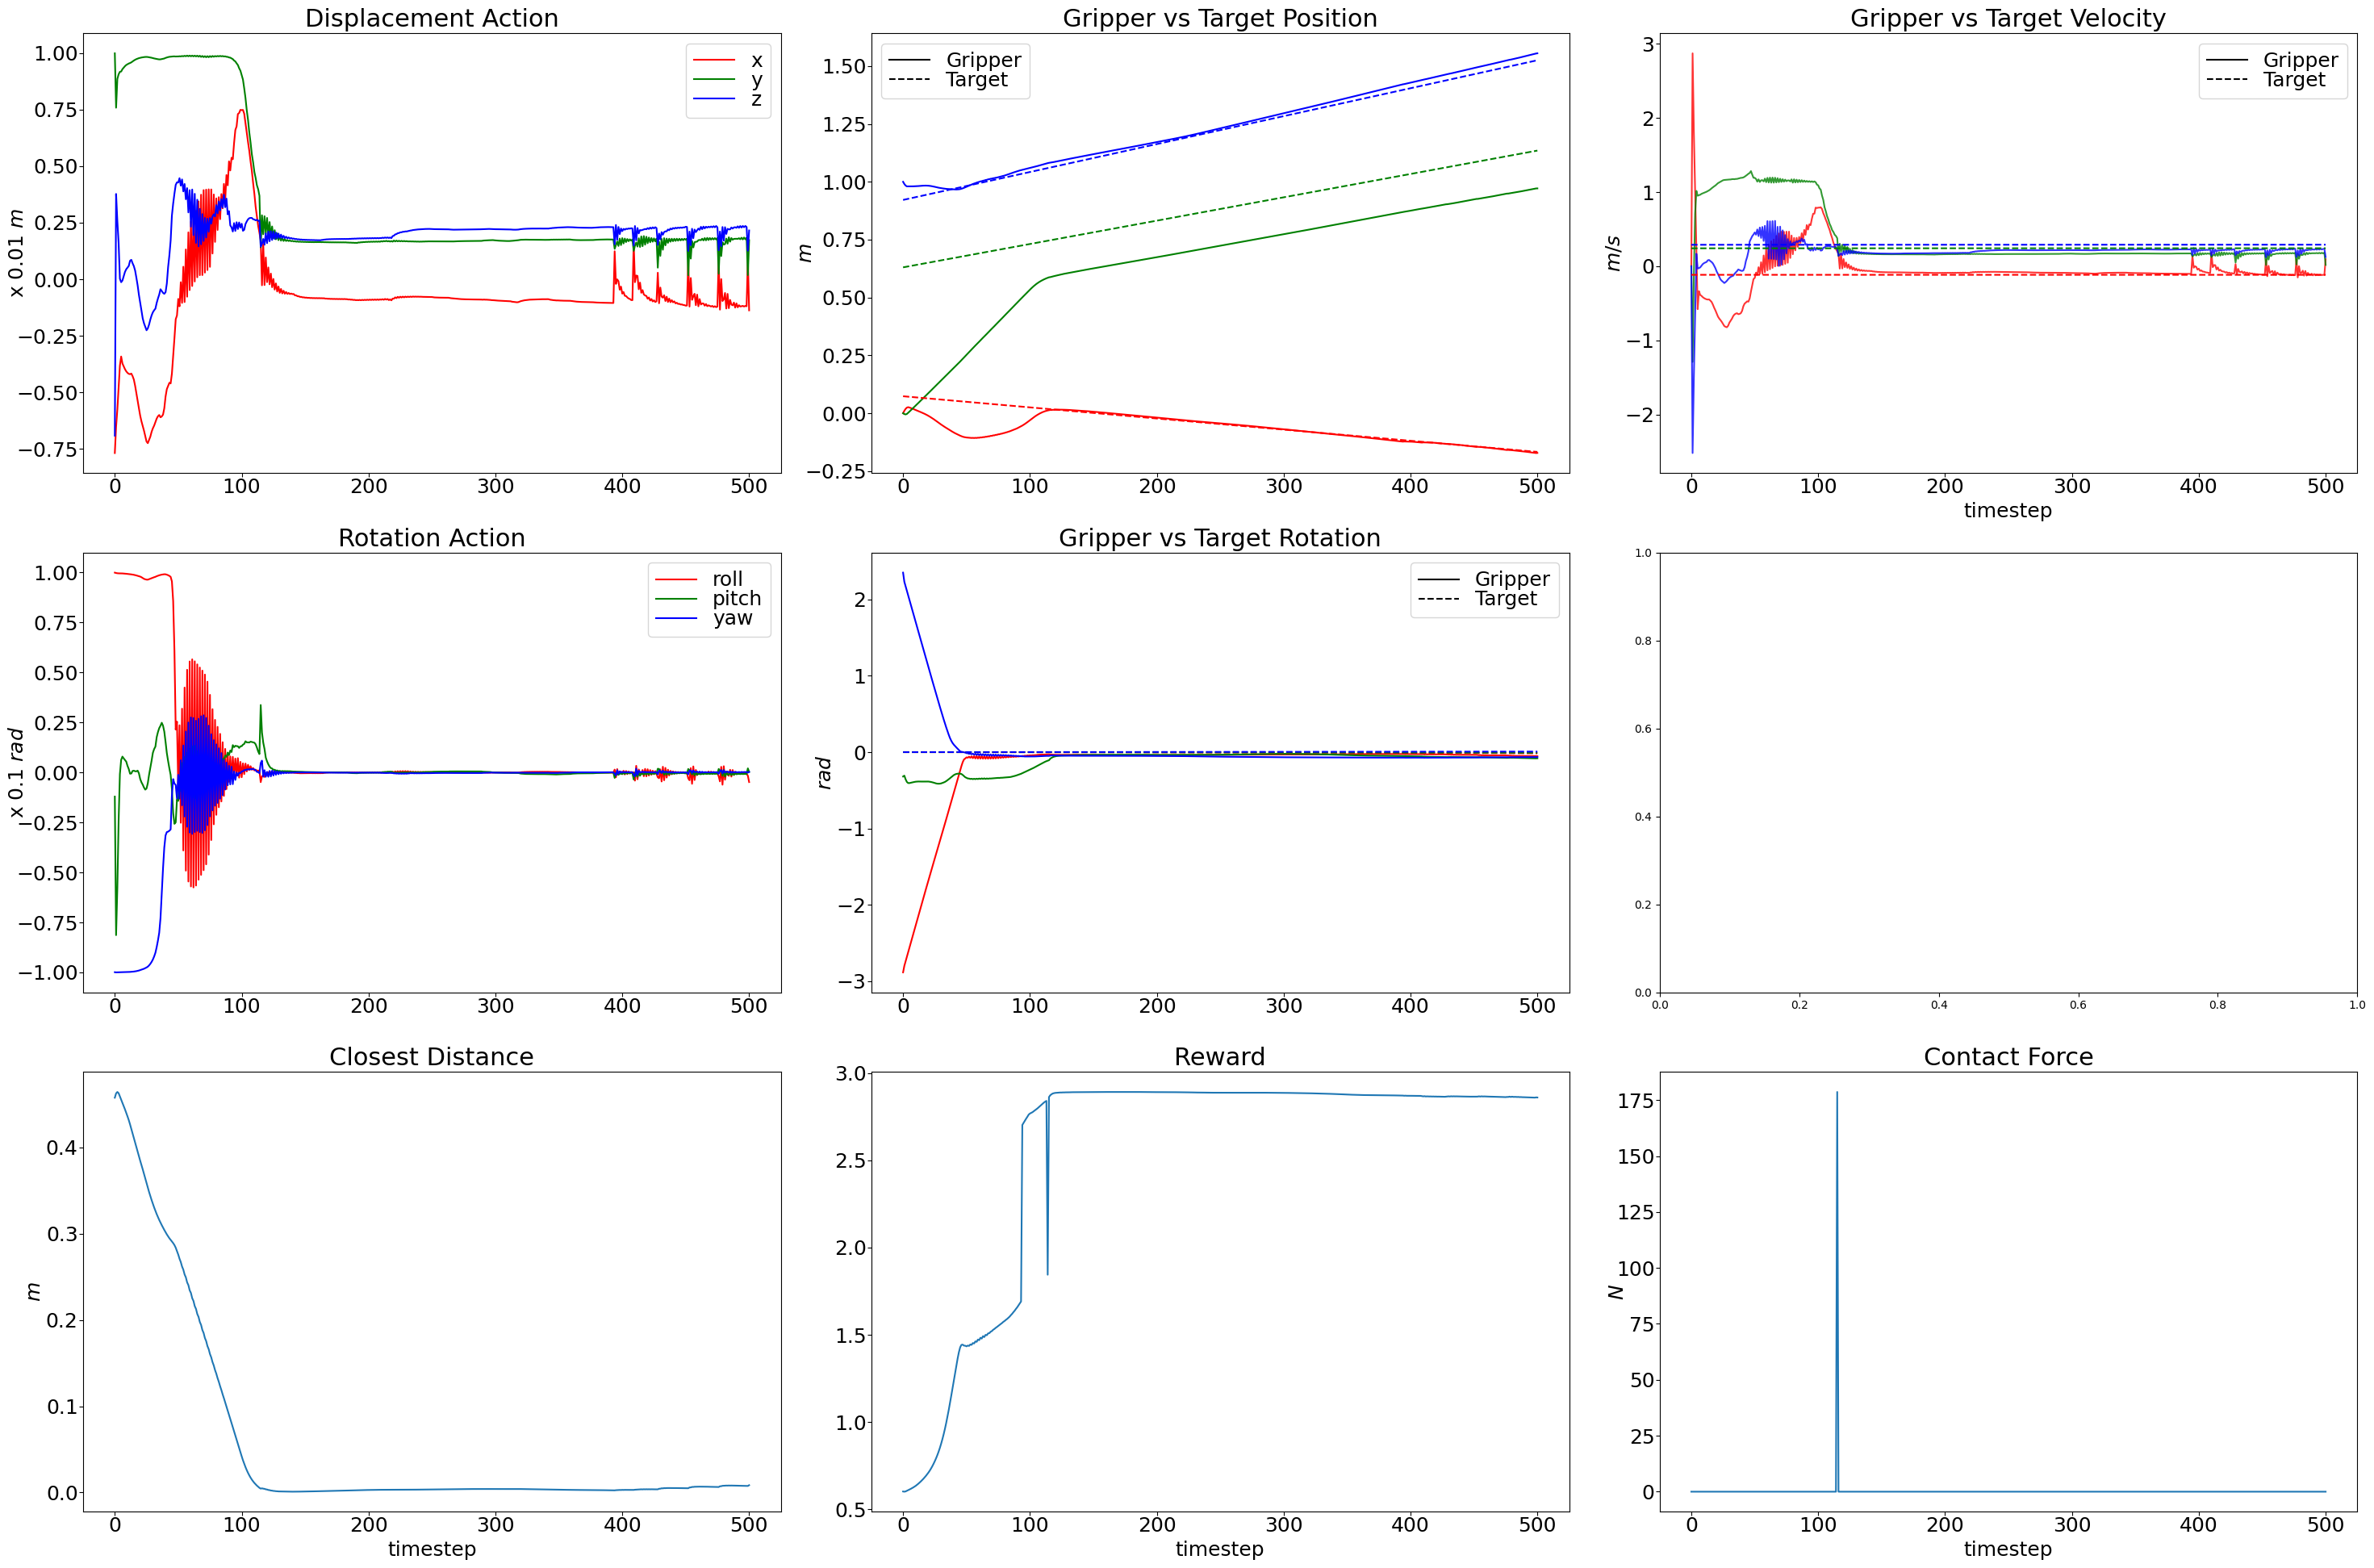

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Read data
header = pd.read_csv('output_data1.csv', nrows=0).columns.tolist()
db = pd.read_csv('output_data22.csv',header=0)
# delete the last row
db = db[:-1]
db.columns = header

# Setting up the figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))
fig.tight_layout(pad=5.0)  # To ensure plots don't overlap with each other
font_size = 18
title_size = 22
pad = 1
solid_line = plt.Line2D([0], [0], color='black', linestyle='-', label='Gripper')
dashed_line = plt.Line2D([0], [0], color='black', linestyle='--', label='Target')

# Displacement Action
axes[0, 0].plot(db["x action"], color='r')
axes[0, 0].plot(db["y action"], color='g')
axes[0, 0].plot(db["z action"], color='b')
axes[0, 0].set_title('Displacement Action', fontsize=title_size)
axes[0, 0].set_ylabel('x 0.01 $m$', fontsize=font_size, labelpad=-10)
# axes[0, 0].set_xlabel('timestep', fontsize=font_size)
axes[0, 0].legend(['x', 'y', 'z'], fontsize=font_size, labelspacing=0.00001)
axes[0, 0].tick_params(labelsize=font_size, pad=pad)

# Rotation Action
axes[1, 0].plot(db["roll action"], color='r')
axes[1, 0].plot(db["pitch action"], color='g')
axes[1, 0].plot(db["yaw action"], color='b')
axes[1, 0].set_title('Rotation Action', fontsize=title_size)
axes[1, 0].set_ylabel('x 0.1 $rad$', fontsize=font_size, labelpad=-10)
# axes[1, 0].set_xlabel('timestep', fontsize=font_size)
axes[1, 0].legend(['roll', 'pitch', 'yaw'], fontsize=font_size, labelspacing=0.00001)
axes[1, 0].tick_params(labelsize=font_size, pad=pad)

# Gripper vs Target Position
axes[0, 1].plot(db["x gripper"], color='r')
axes[0, 1].plot(db["y gripper"], color='g')
axes[0, 1].plot(db["z gripper"], color='b')
axes[0, 1].plot(db["x target"], linestyle='--', color='r')
axes[0, 1].plot(db["y target"], linestyle='--', color='g')
axes[0, 1].plot(db["z target"], linestyle='--', color='b')
axes[0, 1].set_title('Gripper vs Target Position', fontsize=title_size)
axes[0, 1].set_ylabel('$m$', fontsize=font_size, labelpad=-10)
axes[0, 1].legend(handles=[solid_line, dashed_line], fontsize=font_size, labelspacing=0.00001)
axes[0, 1].tick_params(labelsize=font_size, pad=pad)
# axes[0, 2].legend(['x gripper', 'y gripper', 'z gripper', 'x target', 'y target', 'z target'])

# Gripper vs Target Rotation
axes[1, 1].plot(db["roll gripper"], color='r')
axes[1, 1].plot(db["pitch gripper"], color='g')
axes[1, 1].plot(db["yaw gripper"], color='b')
axes[1, 1].plot(db["roll target"], linestyle='--', color='r')
axes[1, 1].plot(db["pitch target"], linestyle='--', color='g')
axes[1, 1].plot(db["yaw target"], linestyle='--', color='b')
axes[1, 1].set_title('Gripper vs Target Rotation', fontsize=title_size)
axes[1, 1].set_ylabel('$rad$', fontsize=font_size, labelpad=pad)
axes[1, 1].legend(handles=[solid_line, dashed_line], fontsize=font_size, labelspacing=0.00001)
axes[1, 1].tick_params(labelsize=font_size, pad=pad)
# axes[0, 3].legend(['roll gripper', 'pitch gripper', 'yaw gripper', 'roll target', 'pitch target', 'yaw target'])

# Gripper vs Target Velocity
axes[0, 2].plot(db["x velocity gripper"], color='r', alpha=0.8)
axes[0, 2].plot(db["y velocity gripper"], color='g', alpha=0.8)
axes[0, 2].plot(db["z velocity gripper"], color='b', alpha=0.8)
axes[0, 2].plot(db["x velocity target"], linestyle='--', color='r')
axes[0, 2].plot(db["y velocity target"], linestyle='--', color='g')
axes[0, 2].plot(db["z velocity target"], linestyle='--', color='b')
axes[0, 2].set_title('Gripper vs Target Velocity', fontsize=title_size)
axes[0, 2].set_ylabel('$m/s$', fontsize=font_size, labelpad=pad)
axes[0, 2].set_xlabel('timestep', fontsize=font_size)
axes[0, 2].legend(handles=[solid_line, dashed_line], fontsize=font_size, labelspacing=0.00001)
axes[0, 2].tick_params(labelsize=font_size, pad=pad)
# axes[1, 0].legend([r'$\dot{x}$ gripper', r'$\dot{y}$ gripper', r'$\dot{z}$ gripper', 
#                    r'$\dot{x}$ target', r'$\dot{y}$ target', r'$\dot{z}$ target'])

# Gripper vs Target angular Velocity
axes[1, 2].plot(db["x angular velocity gripper"], color='r', alpha=0.8)
axes[1, 2].plot(db["y angular velocity gripper"], color='g', alpha=0.8)
axes[1, 2].plot(db["z angular velocity gripper"], color='b', alpha=0.8)
axes[1, 2].plot(db["x angular velocity target"], linestyle='--', color='r')
axes[1, 2].plot(db["y angular velocity target"], linestyle='--', color='g')
axes[1, 2].plot(db["z angular velocity target"], linestyle='--', color='b')
axes[1, 2].set_title('Gripper vs Target Angular Velocity', fontsize=title_size)
axes[1, 2].set_ylabel('$rad/s$', fontsize=font_size, labelpad=pad)
axes[1, 2].set_xlabel('timestep', fontsize=font_size)
axes[1, 2].legend(handles=[solid_line, dashed_line], fontsize=font_size, labelspacing=0.00001)
axes[1, 2].tick_params(labelsize=font_size, pad=pad)

# Closest Distance
axes[2, 0].plot(db["closest distance"])
axes[2, 0].set_title('Closest Distance', fontsize=title_size)
axes[2, 0].set_ylabel('$m$', fontsize=font_size, labelpad=pad)
axes[2, 0].set_xlabel('timestep', fontsize=font_size)
axes[2, 0].tick_params(labelsize=font_size, pad=pad)

# Reward
axes[2, 1].plot(db["rewards"])
axes[2, 1].set_title('Reward', fontsize=title_size)
# axes[1, 2].set_ylabel('x 10mm', fontsize=font_size)
axes[2, 1].set_xlabel('timestep', fontsize=font_size)
axes[2, 1].tick_params(labelsize=font_size, pad=pad)

# Contact Force
axes[2, 2].plot(db["contact force"])
axes[2, 2].set_title('Contact Force', fontsize=title_size)
axes[2, 2].set_ylabel('$N$', fontsize=font_size, labelpad=-10)
axes[2, 2].set_xlabel('timestep', fontsize=font_size)
axes[2, 2].tick_params(labelsize=font_size, pad=pad)


